## 1. Import Libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
%matplotlib inline

In [83]:
# path to project folder
path = r"C:\Users\Acer\Desktop\World Happiness Report\02 Data"

In [84]:
# importing dataframe from 2015 original folder
df_happiness = pd.read_csv(os.path.join(path,'Original Data','2015.csv'),index_col=False)

In [85]:
df_happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## 2. Data cleaning

In [86]:
df_happiness.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [87]:
df_happiness.head(20)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [88]:
df_happiness.shape

(158, 12)

In [89]:
# Rename the columns in the same way as in Exercise 6.2 original folder

df_happiness.rename(columns = {'Happiness Rank' : 'Happiness_Rank', 'Happiness Score': 'Happiness_Score', 'Standard Error': 'Standard_error', 'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Life_Expectancy', 'Trust (Government Corruption)': 'Government_Corruption', 'Dystopia Residual': 'Dystopia_Residual'}, inplace = True)

## Missing values

In [90]:
# Check for missing values

df_happiness.isnull().sum()

# No missing values to handle

Country                  0
Region                   0
Happiness_Rank           0
Happiness_Score          0
Standard_error           0
Economy                  0
Family                   0
Life_Expectancy          0
Freedom                  0
Government_Corruption    0
Generosity               0
Dystopia_Residual        0
dtype: int64

### Duplicates check


In [91]:
dups = df_happiness.duplicated()

In [92]:
dups.shape # No dups

(158,)

### Extreme values check

C:\Users\Acer\AppData\Local\Temp\ipykernel_3004\2076840276.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_happiness['Happiness_Score'], bins=25) # Shows extreme values
C:\Users\Acer\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Happiness_Score', ylabel='Density'>

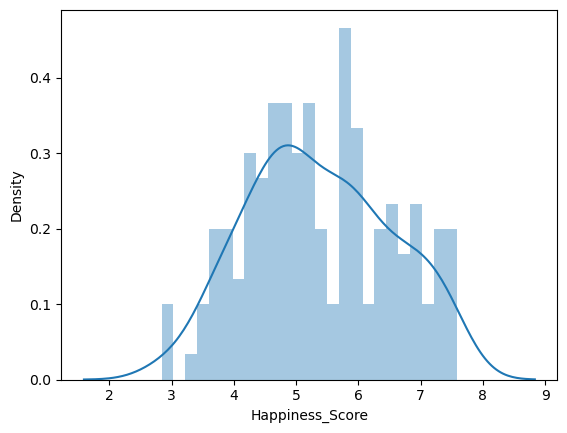

In [93]:
sns.distplot(df_happiness['Happiness_Score'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [94]:
df_happiness['Happiness_Score'].mean() # Check the mean

5.375734177215189

In [95]:
df_happiness['Happiness_Score'].median() # Check the median

5.2325

In [96]:
df_happiness['Happiness_Score'].max() # Check the max

7.587

## 3. Data prep for regression analysis

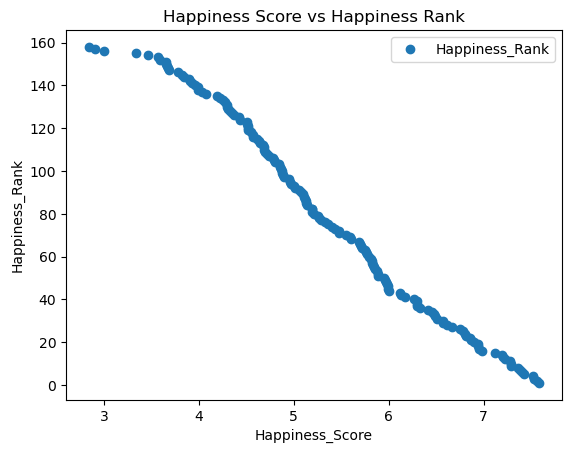

In [97]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_happiness.plot(x = 'Happiness_Score', y='Happiness_Rank',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness Score vs Happiness Rank')  
plt.xlabel('Happiness_Score')  
plt.ylabel('Happiness_Rank')  
plt.show()

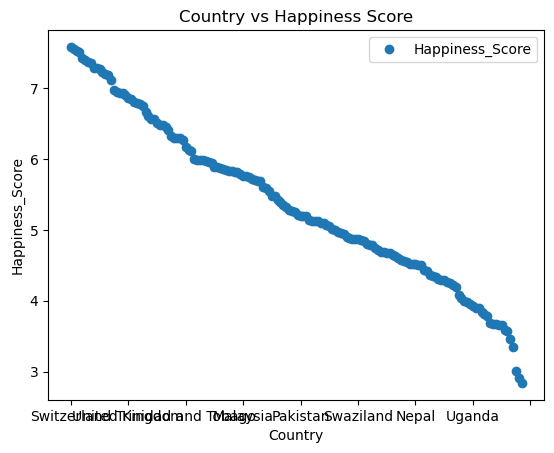

In [98]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_happiness.plot(x = 'Country', y='Happiness_Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Country vs Happiness Score')  
plt.xlabel('Country')  
plt.ylabel('Happiness_Score')  
plt.show()

In [100]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_happiness['Happiness_Score'].values.reshape(-1,1)
y = df_happiness['Happiness_Rank'].values.reshape(-1,1)

In [101]:
X

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.853],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.611],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.168],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [

In [102]:
y

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [104]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [105]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [106]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [107]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

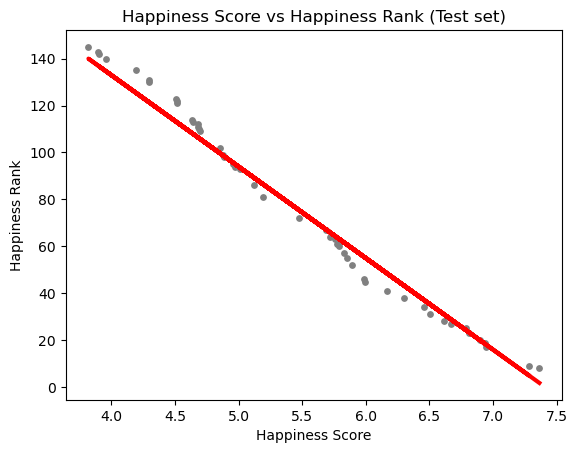

In [116]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Happiness Rank (Test set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Happiness Rank')
plot_test.show()

In [117]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [121]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

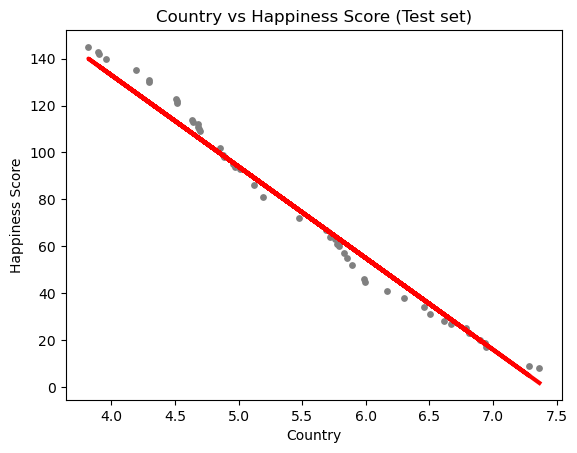

In [122]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Country vs Happiness Score (Test set)')
plot_test.xlabel('Country')
plot_test.ylabel('Happiness Score')
plot_test.show()

#### Hypothesis: If a country has higher happiness score, then the country will have higher happiness rank

In [112]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [123]:
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are your training data
regression = LinearRegression()
regression.fit(X_train, y_train)

# Print the model summary statistics
print('Slope (Coefficients):', regression.coef_)
print('Intercept:', regression.intercept_)

Slope (Coefficients): [[-38.99112784]]
Intercept: [288.91010168]


In [124]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-38.99112784]]
Mean squared error:  27.527011413984237
R2 score:  0.9841647699021832


#### The MSE is quite large and R2 is quite small. This is indicating a poor fit

In [125]:
y_predicted

array([[  1.77943627],
       [ 55.15829028],
       [108.2642064 ],
       [112.90415061],
       [ 66.03681495],
       [113.17708851],
       [112.98213287],
       [134.66119995],
       [106.19767662],
       [ 93.68152459],
       [ 24.31630816],
       [136.6887386 ],
       [ 28.83927899],
       [ 63.93129405],
       [ 86.39018368],
       [ 98.43844218],
       [121.36522535],
       [ 98.78936234],
       [137.00066762],
       [ 61.66980863],
       [ 55.4702193 ],
       [ 37.22237148],
       [ 63.11248036],
       [  4.82074424],
       [ 48.41282517],
       [ 43.34397855],
       [ 99.53019376],
       [ 19.83232846],
       [140.00298446],
       [105.8857476 ],
       [ 59.29134983],
       [ 60.88998607],
       [ 18.07772771],
       [121.56018099],
       [125.38131152],
       [ 23.38052109],
       [ 95.08520519],
       [ 67.0895754 ],
       [107.91328625],
       [ 95.55309872],
       [ 31.13975553],
       [106.54859678],
       [106.39263226],
       [ 89

In [126]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,8,1.779436
1,45,55.158290
2,114,108.264206
3,121,112.904151
4,64,66.036815
5,123,113.177089
6,122,112.982133
7,140,134.661200
8,110,106.197677
9,93,93.681525


###### In some cases, predicted values are close and very close to actual values. I think this model could be suitable for prediction

##### Compare how the regression fits the training set

In [127]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [128]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [129]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-38.99112784]]
Mean squared error:  35.829648902243214
R2 score:  0.9839069900592269


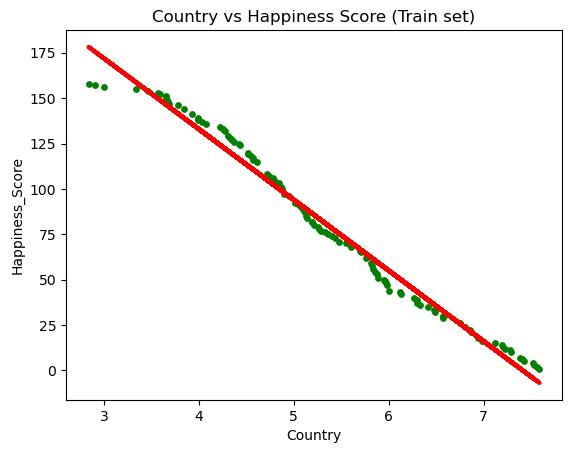

In [130]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Country vs Happiness Score (Train set)')
plot_test.xlabel('Country')
plot_test.ylabel('Happiness_Score')
plot_test.show()

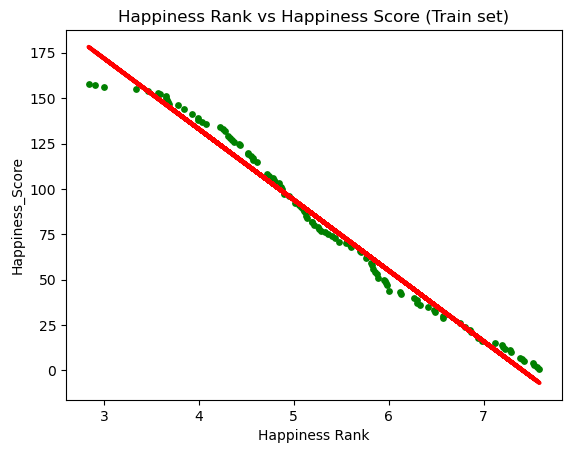

In [131]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Happiness Rank vs Happiness Score (Train set)')
plot_test.xlabel('Happiness Rank')
plot_test.ylabel('Happiness_Score')
plot_test.show()

### 5. Performance improvement after removing the outliers

In [137]:
# Clean the extreme values from the "Happiness_Score" variable observed during the consistency checks.

df_test = df_happiness[df_happiness['Happiness_Score'] <=100] 

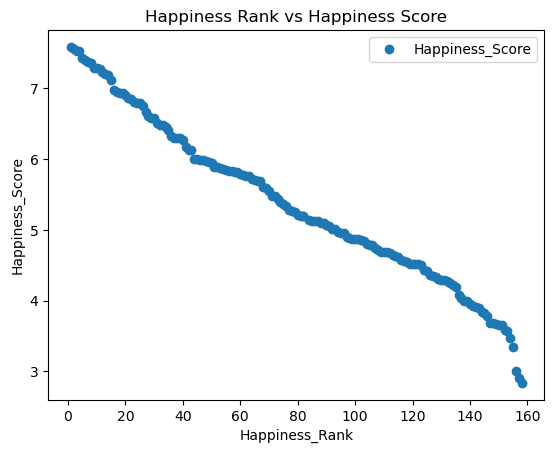

In [141]:
# How the scatterplot looks without outliers.

df_test.plot(x = 'Happiness_Rank', y='Happiness_Score', style='o')  
plt.title('Happiness Rank vs Happiness Score')  
plt.xlabel('Happiness_Rank')  
plt.ylabel('Happiness_Score')  
plt.show()

In [142]:
# Reshape again.

X_2 = df_test['Happiness_Rank'].values.reshape(-1,1)
y_2 = df_test['Happiness_Score'].values.reshape(-1,1)

In [143]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [144]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [145]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [146]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [147]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.02523412]]
Mean squared error:  0.015524146247389632
R2 score:  0.9841548512792292


##### There's no big value gap between MSE and R2. The gap between MSE and R2 are little bit close. Indicating good fit

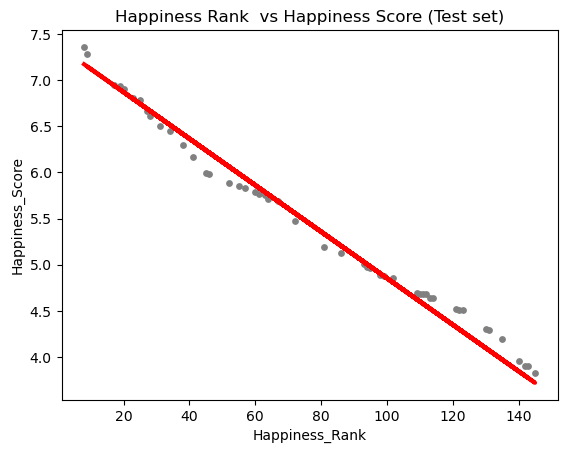

In [148]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Happiness Rank  vs Happiness Score (Test set)')
plot_test.xlabel('Happiness_Rank')
plot_test.ylabel('Happiness_Score')
plot_test.show()

In [149]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,7.364,7.174561
1,5.995,6.240899
2,4.633,4.499744
3,4.514,4.323105
4,5.716,5.761450
5,4.507,4.272637
6,4.512,4.297871
7,3.956,3.843657
8,4.686,4.600681
9,5.007,5.029661


#### predicted values are very close to actual values. It means the model is ideal for carrying out prediction

In [164]:
#export file

import os

# Assuming path is the base directory
path = "C:\\Users\\Acer\\Desktop\\World Happiness Report"

# Ensure the 'Prepared Data' directory exists
prepared_data_path = os.path.join(path, '02 Data', 'Prepared Data')
os.makedirs(prepared_data_path, exist_ok=True)

# Save the pickled file to the correct path
df_happiness.to_pickle(os.path.join(prepared_data_path, 'World_Happiness_Report.pkl'))

                        